In [32]:
#导入模块
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname=r"/root/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/msyh.ttf")
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
#导入数据
datalist = ["AirConditionDaily/空调数据采集7.15-7.16.csv", "AirConditionDaily/空调数据采集7.16-7.17.csv",
            "AirConditionDaily/空调数据采集7.17-7.18.csv", "AirConditionDaily/空调数据采集7.18-7.19.csv",
            "AirConditionDaily/空调数据采集7.19-7.20.csv", "AirConditionDaily/空调数据采集7.20-7.21.csv",
            "AirConditionDaily/空调数据采集7.21-7.22.csv", "AirConditionDaily/空调数据采集7.22-7.23.csv",
             "AirConditionDaily/空调数据采集7.23-7.24.csv", "AirConditionDaily/空调数据采集7.24-7.25.csv",
             "AirConditionDaily/空调数据采集7.25-7.26.csv", "AirConditionDaily/空调数据采集7.26-7.27.csv",
             "AirConditionDaily/空调数据采集7.27-7.28.csv", "AirConditionDaily/空调数据采集7.28-7.29.csv",
            "AirConditionDaily/空调数据采集7.29-7.30.csv", "AirConditionDaily/空调数据采集7.30-7.31.csv",
            "AirConditionDaily/空调数据采集7.31-8.1.csv", "AirConditionDaily/空调数据采集8.3-8.4.csv",
            "AirConditionDaily/空调数据采集8.10-8.11.csv","AirConditionDaily/空调数据采集8.17-8.19.csv",
            "AirConditionDaily/空调数据采集8.23-8.26.csv", "AirConditionDaily/空调数据采集0831-0901.csv",
            "AirConditionDaily/空调数据采集9.7-9.8.csv", "AirConditionDaily/9.14-9.15空调数据采集.csv"]

data_train = []
index = 1
for file_ in datalist:
    temp = pd.read_csv(file_, encoding = "GB18030")
    temp["index"] = index
    data_train.append(temp)
    index += 1
data_train_new = pd.concat(data_train)
print(type(data_train_new))
data_train_new = data_train_new[data_train_new[u"环境温度(℃)"]<100]
data_train_new = data_train_new[data_train_new[u"左边CONT CABIN DUCT"]<100]
data_train_new = data_train_new[data_train_new[u"左边L PACK"]<100]
data_train_new = data_train_new[data_train_new[u"右边L PACK"]<100]

data_train_new.drop(u'执行反吹左侧 (机器输出结果)', axis=1, inplace=True)
data_train_new.drop(u'执行反吹右侧 (机器输出结果)', axis=1, inplace=True)
data_train_new.drop(u'换件', axis=1, inplace=True)

data_train_new.loc[data_train_new[u"执行反吹左侧"]==data_train_new[u"执行反吹左侧"],u"执行反吹左侧"] = 1
data_train_new.loc[data_train_new[u"执行反吹右侧"]==data_train_new[u"执行反吹右侧"],u"执行反吹右侧"] = 1

data_train_new[u"执行反吹左侧"].fillna(0,inplace=True)
data_train_new[u"执行反吹右侧"].fillna(0,inplace=True)

data_train_new[u"左温差"] = data_train_new[u"左边L PACK"] - data_train_new[u"环境温度(℃)"]
data_train_new[u"右温差"] = data_train_new[u"右边L PACK"] - data_train_new[u"环境温度(℃)"]

data_train_new.drop_duplicates(subset=[u'日期', u'飞机号'], keep='first', inplace=True)
#data_train_new.drop_duplicates(subset=['index', u'飞机号'], keep='last', inplace=True)

data_train_new.columns = ['Date','Location','PlaneNo','PlaneModel','EnvTemp','LEFT CONT CABIN DUCT', 'LEFT L PACK',
                          'LEFT SUPPLY DUCT','RIGHT FWD DUCT','RIGHT AFT DUCT','RIGHT L PACK','RIGHT SUPPLY DUCT','Left Handle',
                          'Right Handle', 'index','Left Temp Diff','Right Temp Diff']


data1 = pd.concat([data_train_new])
data1

<class 'pandas.core.frame.DataFrame'>


,Date,Location,PlaneNo,PlaneModel,EnvTemp,LEFT CONT CABIN DUCT,LEFT L PACK,LEFT SUPPLY DUCT,RIGHT FWD DUCT,RIGHT AFT DUCT,RIGHT L PACK,RIGHT SUPPLY DUCT,Left Handle,Right Handle,index,Left Temp Diff,Right Temp Diff
0,2019-07-16 11:44,XNN,7399,737-800,20,4,22,0,5,4,23,0,0,0,1,2,3
1,2019-07-16 11:42,XNN,7398,737-800,18,5,23,0,4,6,23,0,0,0,1,5,5
2,2019-07-16 11:06,CTU,6800,737-800,23,3,29,0,4,3,28,0,0,0,1,6,5
3,2019-07-16 11:00,HHA,7377,737-800,28,6,34,0,7,6,30,0,0,0,1,6,2
4,2019-07-16 09:14,XIY,1483,737-800,25,4,28,0,4,4,32,0,0,0,1,3,7
5,2019-07-16 09:00,XMN,5522,737-800,22,9,36,0,8,9,37,0,1,1,1,14,15
6,2019-07-16 08:59,XMN,1497,737-800,29,9,37,0,4,3,36,0,0,0,1,8,7
7,2019-07-16 08:58,XMN,1785,737-800,30,4,30,0,8,8,32,0,0,0,1,0,2
8,2019-07-16 08:58,XMN,1141,737-800,30,4,34,0,5,5,32,0,0,0,1,4,2
9,2019-07-16 08:31,KMG,5292,737-700,20,0,0,6,0,0,0,5,0,0,1,-20,-20


In [33]:
# 按比例切分数据集
from sklearn.model_selection import train_test_split
col = ["EnvTemp", "Left Temp Diff","LEFT CONT CABIN DUCT","LEFT L PACK", "LEFT SUPPLY DUCT"]
X = data1[col]
y = data1['Left Handle']
# X_train_left, X_test_left, y_train_left, y_test_left = train_test_split(X, y, test_size = 0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# tr = pd.concat([X_train_left, y_train_left], axis=1)
tr = pd.concat([X_train, y_train], axis=1)
print(tr.shape)
# te = pd.concat([X_test_left, y_test_left], axis=1)
te = pd.concat([X_test, y_test], axis=1)
print(te.shape)

tr.dropna(inplace=True)
te.fillna(0, inplace=True)

X_train = tr.iloc[:, :-1]
y_train = tr.iloc[:, -1:]
X_test = te.iloc[:, :-1]
y_test = te.iloc[:, -1:]
X_t = tr
# print(tr.shape)
# print(te.shape)
print(X_train)
print(y_train)

(4750, 6)
(528, 6)
     EnvTemp  Left Temp Diff  LEFT CONT CABIN DUCT  LEFT L PACK  \
169       27             -27                     0            0   
142       26               2                     6           28   
194       15               9                     4           24   
140       25               9                     6           34   
120       28              -3                     3           25   
178       30               4                     6           34   
14        28               7                     4           35   
76        27               5                     5           32   
51        28               6                     6           34   
161       29               5                     5           34   
95        26              10                     5           36   
49        32               5                     9           37   
158       27               1                     4           28   
7         28               7               

In [31]:
# 按index（天数）切分数据集
col = ["EnvTemp", "Left Temp Diff","LEFT CONT CABIN DUCT","LEFT L PACK", "LEFT SUPPLY DUCT"]

data_test = data1[data1["index"]==index-1]
data1 = data1[data1["index"]<index-1]
print(data_test.shape)
print(data1.shape)

data1.dropna(inplace=True)
data_test.fillna(0, inplace=True)

print(data_test.shape)
print(data1.shape)

X_train, y_train = data1[col], data1["Left Handle"]
X_test, y_test = data_test[col], data_test["Left Handle"]

X_t = pd.concat([X_train, y_train], axis=1)
print(X_train)
print(y_train)

(212, 17)
(5066, 17)
(212, 17)
(5061, 17)
     EnvTemp  Left Temp Diff  LEFT CONT CABIN DUCT  LEFT L PACK  \
0         20               2                     4           22   
1         18               5                     5           23   
2         23               6                     3           29   
3         28               6                     6           34   
4         25               3                     4           28   
5         22              14                     9           36   
6         29               8                     9           37   
7         30               0                     4           30   
8         30               4                     4           34   
9         20             -20                     0            0   
10        25               7                     5           32   
11        28               0                     4           28   
12        20               9                     4           29   
13        29        

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:

#Under Sample
# concatenate our training data back together


# separate minority and majority classes
not_fraud = X_t[X_t["Left Handle"]==0]
fraud = X_t[X_t["Left Handle"]==1]
print(not_fraud.shape)
print(fraud.shape)
# upsample minority
not_fraud_undersampled = resample(not_fraud,
                          replace=False, # sample with replacement
                          n_samples=len(fraud)*12, # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
undersampled = pd.concat([not_fraud_undersampled, fraud])

y_train = undersampled["Left Handle"]
X_train = undersampled.drop('Left Handle', axis=1)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

import statistics as sta
model1 = SGDClassifier(loss='squared_hinge',penalty='none', alpha=0.001)
model2 = DecisionTreeClassifier(max_depth=17, min_samples_split=10)
model3 = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model4 = GaussianNB()
model5 = QuadraticDiscriminantAnalysis()
model6 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.6, 
                  colsample_bytree= 1.0, max_depth= 5, gamma=1, min_child_weight= 1)
model7 = KNeighborsClassifier(2)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

# from sklearn.externals import joblib
# joblib.dump(model1, 'model1.pkl')
# rfc2 = joblib.load('model1.pkl')
# type(rfc2)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

print(model1.score(X_test,y_test))
print(model2.score(X_test,y_test))
print(model3.score(X_test,y_test))
print(model4.score(X_test,y_test))
print(model5.score(X_test,y_test))
print(model6.score(X_test,y_test))
print(model7.score(X_test,y_test))

y_pred = np.array([])
for i in range(0,len(X_test)):
    #sta.mode(离散数据的模式（即数据中最常见的值）)
    y_pred = np.append(y_pred, sta.mode([pred1[i], pred2[i], pred3[i], pred4[i], pred5[i],pred6[i],pred7[i]]))
    
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


(4583, 6)
(167, 6)


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are co

0.9791666666666666
0.9715909090909091
0.9734848484848485
0.7310606060606061
0.9734848484848485
0.9772727272727273
0.9772727272727273
0.817658570277426
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       514
           1       0.55      0.79      0.65        14

   micro avg       0.98      0.98      0.98       528
   macro avg       0.77      0.88      0.82       528
weighted avg       0.98      0.98      0.98       528

[[505   9]
 [  3  11]]


In [35]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
Precision1 = precision_score(y_test, pred1, average='macro')
Precision2 = precision_score(y_test, pred2, average='macro')
Precision3 = precision_score(y_test, pred3, average='macro')
Precision4 = precision_score(y_test, pred4, average='macro')
Precision5 = precision_score(y_test, pred5, average='macro')
Precision6 = precision_score(y_test, pred6, average='macro')
Precision7 = precision_score(y_test, pred7, average='macro')

recall1 = recall_score(y_test, pred1, average='macro')
recall2 = recall_score(y_test, pred2, average='macro')
recall3 = recall_score(y_test, pred3, average='macro')
recall4 = recall_score(y_test, pred4, average='macro')
recall5 = recall_score(y_test, pred5, average='macro')
recall6 = recall_score(y_test, pred6, average='macro')
recall7 = recall_score(y_test, pred7, average='macro')

f1_score1 = f1_score(y_test, pred1, average='macro')
f1_score2 = f1_score(y_test, pred2, average='macro')
f1_score3 = f1_score(y_test, pred3, average='macro')
f1_score4 = f1_score(y_test, pred4, average='macro')
f1_score5 = f1_score(y_test, pred5, average='macro')
f1_score6 = f1_score(y_test, pred6, average='macro')
f1_score7 = f1_score(y_test, pred7, average='macro')
print([Precision1,Precision2,Precision3,Precision4,Precision5,Precision6,Precision7])
print(recall1,recall2,recall3,recall4,recall5,recall6,recall7)
print(f1_score1,f1_score2,f1_score3,f1_score4,f1_score5,f1_score6,f1_score7)
print(Precision5,recall5,f1_score5)
print(classification_report(y_test, pred5))

import matplotlib.pyplot as plt  
 
name_list = ['L_SGD', 'L_DT','L_AdaBoost', 'L_GaussianNB', 'L_QDA', 'L_xgb', 'L_Knn']  
Precision_list = [Precision1,Precision2,Precision3,Precision4,Precision5,Precision6,Precision7]
recall_list1 = [recall1,recall2,recall3,recall4,recall5,recall6,recall7]  
f1_score_list = [f1_score1,f1_score2,f1_score3,f1_score4,f1_score5,f1_score6,f1_score7]


x =list(range(len(name_list)))  
total_width, n = 0.8, 3 
width = total_width / (1.5*n)    
plt.bar(x, Precision_list, width=width, label='Precision',fc = 'g')  
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, recall_list1, width=width, label='recall',tick_label = name_list,fc = 'r')  
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, f1_score_list, width=width, label='f1_score',fc = 'b')
font1 = {
'size'   : 6.5,
}
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),prop=font1) 
#保存图片
#plt.savefig('figure.eps')
plt.show()  

(0.48674242424242425, 0.5, 0.4932821497120921)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       514
           1       0.00      0.00      0.00        14

   micro avg       0.97      0.97      0.97       528
   macro avg       0.49      0.50      0.49       528
weighted avg       0.95      0.97      0.96       528



/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/pyth

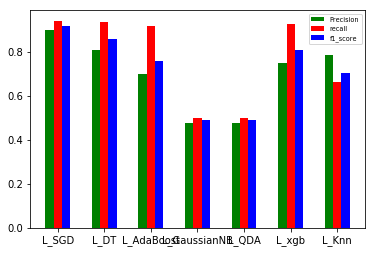

In [6]:
import matplotlib.pyplot as plt  
 
name_list = ['L_SGD', 'L_DT','L_AdaBoost', 'L_GaussianNB', 'L_QDA', 'L_xgb', 'L_Knn']  
Precision_list = [Precision1,Precision2,Precision3,Precision4,Precision5,Precision6,Precision7]
recall_list1 = [recall1,recall2,recall3,recall4,recall5,recall6,recall7]  
f1_score_list = [f1_score1,f1_score2,f1_score3,f1_score4,f1_score5,f1_score6,f1_score7]


x =list(range(len(name_list)))  
total_width, n = 0.8, 3 
width = total_width / (1.5*n)    
plt.bar(x, Precision_list, width=width, label='Precision',fc = 'g')  
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, recall_list1, width=width, label='recall',tick_label = name_list,fc = 'r')  
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, f1_score_list, width=width, label='f1_score',fc = 'b')
font1 = {
'size'   : 6.5,
}
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),prop=font1) 
#保存图片
#plt.savefig('figure.eps')
plt.show()  

In [8]:

L_SGD = model1.score(X_test,y_test)
L_DT = model2.score(X_test,y_test)
L_AdaBoost = model3.score(X_test,y_test)
L_GaussianNB = model4.score(X_test,y_test)
L_QDA = model5.score(X_test,y_test)
L_xgb = model6.score(X_test,y_test)
L_KNN = model7.score(X_test,y_test)

print(L_SGD)
print(L_DT)
print(L_AdaBoost)
print(L_GaussianNB)
print(L_QDA)
print(L_xgb)
print(L_KNN)
print(classification_report(y_test, pred1))
print(classification_report(y_test, pred2))
print(classification_report(y_test, pred3))
print(classification_report(y_test, pred4))
print(classification_report(y_test, pred5))
print(classification_report(y_test, pred6))
print(classification_report(y_test, pred7))


0.9853658536585366
0.9707317073170731
0.9365853658536586
0.9560975609756097
0.9560975609756097
0.9560975609756097
0.9609756097560975
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       196
           1       0.80      0.89      0.84         9

   micro avg       0.99      0.99      0.99       205
   macro avg       0.90      0.94      0.92       205
weighted avg       0.99      0.99      0.99       205

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       196
           1       0.62      0.89      0.73         9

   micro avg       0.97      0.97      0.97       205
   macro avg       0.81      0.93      0.86       205
weighted avg       0.98      0.97      0.97       205

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       196
           1       0.40      0.89      0.55         9

   micro avg       0.94      0.94      0.94      

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

In [69]:
data=[L_SGD,L_DT,L_AdaBoost,L_GaussianNB,L_QDA,L_xgb,L_KNN]
data

[0.978219696969697,
 0.978219696969697,
 0.9810606060606061,
 0.728219696969697,
 0.9734848484848485,
 0.9810606060606061,
 0.9791666666666666]

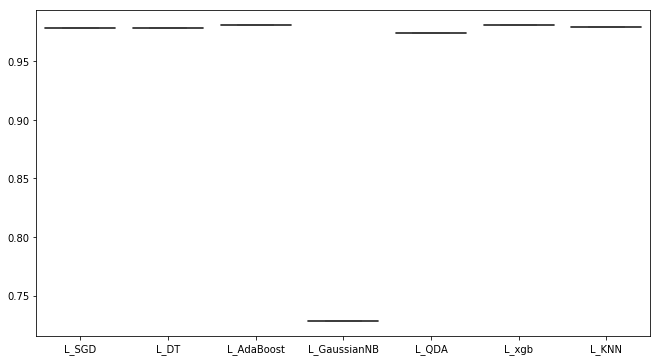

In [84]:
#箱图
import seaborn as sns
_, ax = plt.subplots(figsize=(11, 6))
sns.boxplot( x=["L_SGD","L_DT","L_AdaBoost","L_GaussianNB","L_QDA","L_xgb","L_KNN"],
            y=[L_SGD,L_DT,L_AdaBoost,L_GaussianNB,L_QDA,L_xgb,L_KNN])

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 6.]),
 array([0.7282197 , 0.75350379, 0.77878788, 0.80407197, 0.82935606,
        0.85464015, 0.87992424, 0.90520833, 0.93049242, 0.95577652,
        0.98106061]),
 <a list of 10 Patch objects>)

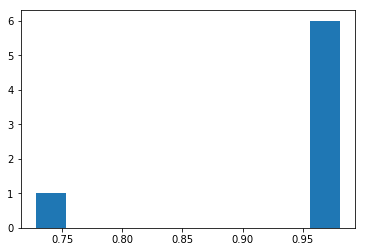

In [93]:
data1=[L_SGD,L_DT,L_AdaBoost,L_GaussianNB,L_QDA,L_xgb,L_KNN]
data1
import seaborn as sns
plt.hist(data1)

In [32]:
# 右侧
# 按照比例切分数据集
from sklearn.model_selection import train_test_split
col = ["EnvTemp", "Right Temp Diff","RIGHT FWD DUCT","RIGHT AFT DUCT","RIGHT L PACK", "RIGHT SUPPLY DUCT"]

X = data1[col]
y = data1['Right Handle']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

tr = pd.concat([X_train, y_train], axis=1)
print(tr.shape)
te = pd.concat([X_test, y_test], axis=1)
print(te.shape)

tr.dropna(inplace=True)
te.fillna(0, inplace=True)

print(tr.shape)
print(te.shape)



(964, 7)
(242, 7)
(964, 7)
(242, 7)


In [8]:
# 按照 index 切分数据集
col = ["EnvTemp", "Right Temp Diff","RIGHT FWD DUCT","RIGHT AFT DUCT","RIGHT L PACK", "RIGHT SUPPLY DUCT"]

data_test = data1[data1["index"]==index-1]
data1 = data1[data1["index"]<index-1]

data1.dropna(inplace=True)
data_test.fillna(0,inplace=True)

X_train, y_train = data1[col], data1["Right Handle"]
X_test, y_test = data_test[col], data_test["Right Handle"]

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [33]:
# concatenate our training data back together
X_t = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
not_fraud = X_t[X_t["Right Handle"]==0]
fraud = X_t[X_t["Right Handle"]==1]

# upsample minority
not_fraud_undersampled = resample(not_fraud,
                          replace=False, # sample with replacement
                          n_samples=len(fraud)*12, # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
undersampled = pd.concat([not_fraud_undersampled, fraud])

y_train = undersampled["Right Handle"]
X_train = undersampled.drop('Right Handle', axis=1)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

import statistics as sta
model1 = SGDClassifier(loss='modified_huber',penalty='none', alpha=0.0001)
model2 = DecisionTreeClassifier(max_depth=13, min_samples_split=10)
model3 = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model4 = GaussianNB()
model5 = xgb.XGBClassifier(random_state=1,learning_rate=0.01, subsample= 0.6, 
                  colsample_bytree= 1.0, max_depth= 3, gamma=5, min_child_weight= 10)
model6 = QuadraticDiscriminantAnalysis()
model7 = KNeighborsClassifier(2)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)
model7.fit(X_train,y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

#pred1[i], pred2[i], pred3[i], pred4[i], pred5[i], pred6[i], pred7[i]
y_pred = np.array([])
for i in range(0,len(X_test)):
    y_pred = np.append(y_pred, sta.mode([pred1[i], pred2[i], pred3[i], pred4[i], pred5[i],pred6[i],pred7[i]]))
    
score = f1_score(y_test, y_pred, average='macro')
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6037426900584795
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       236
           1       0.33      0.17      0.22         6

   micro avg       0.97      0.97      0.97       242
   macro avg       0.66      0.58      0.60       242
weighted avg       0.96      0.97      0.97       242

[[234   2]
 [  5   1]]


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/root/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/root/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are co

In [ ]:
# https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn/notebook

In [3]:
n=pd.read_csv("AirConditionDaily/left20190818.csv",encoding = "GB18030",engine = 'python')
n.shape

(205, 49)

In [7]:
n.iloc[:,-1:]

,pred
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
